# Technique d'apprentissage

### Visualisation des données

In [2]:
import numpy as np
from models.logistic_reg import Logistic
from models.adaboost import Adaboost
from models.mlp import Mlp
from get_data.get_dataset import training_set, test_set
import pandas as pd
from utils import plot_learning_curve
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Visualisation du jeu de données

In [5]:
training_set = training_set.sample(frac=1).reset_index(drop=True)
training_set.head(10)

,contrast_0,contrast_45,contrast_90,contrast_135,correlation_0,correlation_45,correlation_90,correlation_135,energy_0,energy_45,...,std3HF_D,std2HF_H,std2HF_V,mean2HF_D,std2HF_D,std1HF_H,std1HF_V,mean1HF_D,std1HF_D,class
0,-1.242710,-1.335032,-0.788856,-0.906748,0.718493,1.004094,0.499711,0.434641,-0.553243,-0.559976,...,-0.151107,-0.624418,-1.571973,0.210297,-0.539379,-0.545013,-1.355839,0.805146,-0.451683,1.0
1,-0.864191,-0.856431,-0.671881,-0.746122,1.485411,1.532708,1.214916,1.444190,0.652367,0.664899,...,-0.742145,-0.768399,-0.819423,-0.844871,-0.839894,-0.665180,-1.271965,0.637228,-0.840858,1.0
2,-0.301352,-0.153459,-0.004481,-0.089931,-0.004852,-0.172951,-0.337868,-0.250622,-0.703104,-0.735871,...,0.161557,0.284104,-0.060969,0.469254,0.181801,0.295401,0.136028,0.512078,-0.128981,1.0
3,1.658838,0.790258,0.635834,1.476886,-0.269892,0.234028,0.090691,-0.327053,2.284849,2.292143,...,1.591617,0.100211,1.756689,1.202674,1.704823,0.223408,1.027619,1.725460,1.884578,0.0
4,0.120910,-0.225653,-0.701799,-0.245900,-1.408620,-0.942085,0.068777,-0.914719,-0.746491,-0.759156,...,-0.624944,-0.654849,0.431923,0.029735,-0.618014,-0.821378,0.523154,0.433046,-0.750483,1.0
5,-0.179577,-0.208002,-0.183151,0.008551,0.902515,0.915477,0.712122,0.730143,0.299194,0.323314,...,-0.341927,-0.067127,0.260281,0.818317,-0.495068,-0.693964,-0.395520,-0.401116,-0.679838,1.0
6,-0.833998,-0.800192,-0.716422,-0.767424,0.720513,0.762971,0.708494,0.725082,-0.715791,-0.739214,...,-0.679096,-0.280956,0.120396,0.177023,-1.017871,-0.512274,0.637290,-0.199868,-0.954802,1.0
7,-0.601905,-0.357808,-0.072019,-0.272437,1.042535,0.853160,0.455397,0.774785,-0.024736,-0.002801,...,-0.603899,0.239983,-0.818243,0.476914,-0.316327,-0.172668,-0.756777,-0.412301,-0.243851,1.0
8,-1.951456,-1.710017,-1.218589,-1.658205,1.971533,1.930129,1.446214,1.884975,-0.332816,-0.398665,...,-1.421535,-1.036078,-1.865504,0.845127,-1.224807,-0.924925,-1.549574,-0.749194,-1.888744,1.0
9,-0.059954,0.151227,0.321901,0.054711,0.668903,0.451935,0.111939,0.536442,1.011427,1.016307,...,0.522698,0.756650,-0.419910,-0.066436,0.375035,0.525710,-0.529697,-0.504551,0.339425,0.0


# Logistic classifier

In [3]:
log = Logistic(hyperparams=[0.01, 0.001])

In [6]:
x_train = training_set.loc[:, training_set.columns != 'class'].to_numpy()
y_train = np.squeeze(training_set.loc[:, training_set.columns == 'class'].to_numpy())
x_test = test_set.loc[:, test_set.columns != 'class'].to_numpy()
y_test = np.squeeze(test_set.loc[:, test_set.columns == 'class'].to_numpy())

#### Cross-Validation: 

In [5]:
# log.train(x_train, y_train, tuning=True)
# print(log)
log.train(x_train, y_train, tuning=False)

#### Test plotting learning curves:
Plot les courbes d'apprentissages et utilise une cross-validation pour vérifier les paramètres du modèle. La fonction prend en entrée l'objet sans entraînement et init plusieurs fois l'objet avec les bons paramètres. 

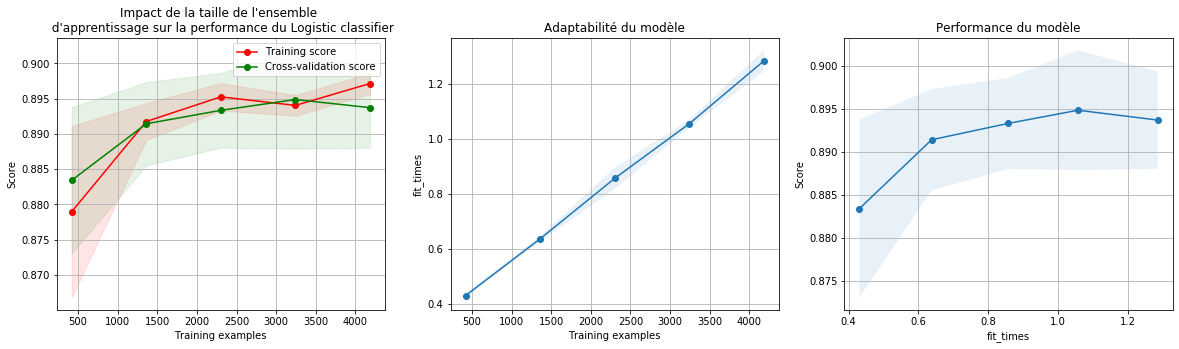

In [6]:
log.reinit()
plot_learning_curve(log.logistic_classifier, "Logistic classifier",x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

#### Matrice de confusion avec les meilleurs paramètres:

In [7]:
log.train(x_train, y_train, tuning=False)
confusion_matrix = pd.DataFrame(log.get_confusion_matrix(x_test, y_test))
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7275641025641025%


,Prédit normal,Prédit malade
0,0.152244,0.222756
1,0.049679,0.575321


### Courbes ROC et précision-rappel:
Pour rappel: 
- La ROC correspond aux taux de vrais positifs (pneumonia bien détectée) en fonction du taux de faux positifs (taux de normal détecté comme pneuomia)
- La précision-rappel correspond à la précision (nombre de pneumonies détectées par rapport aux nombre de pneumonia réelles détectées + nombres de pneumonie fausses détectées (en gros le nombre de pneumonie bien detectées par rapport à tout ce qu'il a detecté)) en fonction du rappel (ou sensibilité: nombre de pneumonie détectées sur le nombres de pneumonies réelles détectées + les pneumonies réelles non détectées)

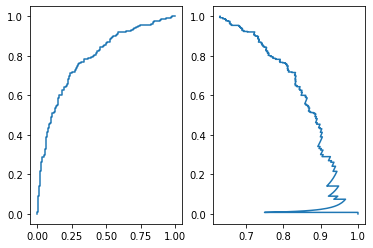

In [8]:
roc, pres_rec = log.get_curves(x_test, y_test)

# Adaboost:

In [ ]:
ada = Adaboost([0.1])

In [ ]:
# Cross-validation !!!!
# ada.train(x_train, y_train, tuning=True)

In [ ]:
ada.train(x_train, y_train, tuning=False)
confusion_matrix = pd.DataFrame(ada.get_confusion_matrix(x_test, y_test))
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

In [ ]:
roc, pres_rec = ada.get_curves(x_test, y_test)

In [ ]:
ada.reinit()
plot_learning_curve(ada.adaboost_classifier, "Adaboost",
                    x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

# Multi-Layer Perceptron

In [ ]:
mlp = Mlp([10, 0.1, 0.1])

In [ ]:
# Cross-validation !!!!
# ada.train(x_train, y_train, tuning=True)

In [ ]:
mlp.train(x_train, y_train, tuning=False)
confusion_matrix = pd.DataFrame(mlp.get_confusion_matrix(x_test, y_test))
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

In [ ]:
roc, pres_rec = mlp.get_curves(x_test, y_test)

In [ ]:
mlp.reinit()
plot_learning_curve(ada.adaboost_classifier, "Adaboost",
                    x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))

# SVM

In [14]:
svmrbf = Svm('rbf', ['gamma', 'régularisation'],hyperparams=[],)
svmlinear = Svm('linear', ['None'],hyperparams=[],)
svmpolynomial = Svm('poly', ['degree'],hyperparams=[],)

In [15]:
svmrbf.train(x_train, y_train, tuning=True)
svmlinear.train(x_train, y_train, tuning=True)
svmpolynomial.train(x_train, y_train, tuning=True)


Tuple testé: [1, 0.001, 1, 0.001, 0.001, 1, 0.001, 1]
Error moyenne:  0.37667304015296366
Tuple meilleur! On change pour:[1, 0.001, 1, 0.001, 0.001, 1, 0.001, 1] et une erreur moyenne de 0.37667304015296366
Tuple testé: [1, 0.001, 1, 0.001, 0.001, 1, 0.001, 10]
Error moyenne:  0.3527724665391969
Tuple meilleur! On change pour:[10, 0.001, 1, 0.001, 0.001, 1, 0.001, 1] et une erreur moyenne de 0.3527724665391969
Tuple testé: [10, 0.001, 1, 0.001, 0.001, 1, 0.001, 100]
Error moyenne:  0.32695984703632885
Tuple meilleur! On change pour:[100, 0.001, 1, 0.001, 0.001, 1, 0.001, 10] et une erreur moyenne de 0.32695984703632885
Tuple testé: [100, 0.001, 1, 0.001, 0.001, 1, 0.001, 1000]
Error moyenne:  0.30975143403441685
Tuple meilleur! On change pour:[1000, 0.001, 1, 0.001, 0.001, 1, 0.001, 100] et une erreur moyenne de 0.30975143403441685
Tuple testé: [1000, 0.001, 1, 0.001, 0.001, 1, 0.0001, 1]
Error moyenne:  0.4149139579349904
Tuple testé: [1, 0.0001, 1, 0.001, 0.001, 1, 0.001, 10]
Error m

In [16]:
confusion_matrix = pd.DataFrame(svmrbf.get_confusion_matrix(x_test, y_test))
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()
confusion_matrix = pd.DataFrame(svmlinear.get_confusion_matrix(x_test, y_test))
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()
confusion_matrix = pd.DataFrame(svmpolynomial.get_confusion_matrix(x_test, y_test))
confusion_matrix.columns = ['Prédit normal', 'Prédit malade']
confusion_matrix.head()

Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7355769230769231%
Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7147435897435898%
Nombres de valeurs de test:234
Nombres d'échantillons malades:390
Nombres d'échantillons sains:624
Justesse: 0.7147435897435898%


,Prédit normal,Prédit malade
0,0.144231,0.230769
1,0.054487,0.570513


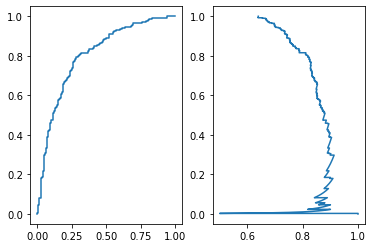

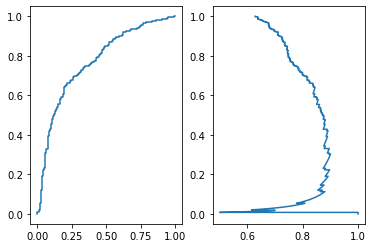

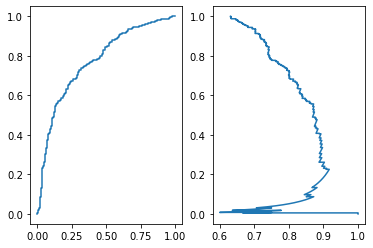

In [17]:
oc, pres_rec = svmrbf.get_curves(x_test, y_test)
oc, pres_rec = svmlinear.get_curves(x_test, y_test)
oc, pres_rec = svmpolynomial.get_curves(x_test, y_test)

In [ ]:
plot_learning_curve(svmrbf, "Logistic classifier",x_train, y_train, train_sizes=np.linspace(0.1, 1.0, 5))